In [1]:
import sklearn.linear_model as lm
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
np.set_printoptions(suppress=True) # remove e-scientific notation

Scikit-Learn Documentations:<br>
* [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
* [L1-Norm: LASSO](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
* [L2-Norm: Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
* [Elastic-Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)

* **Simple Linear Regression**

Intercept: 0.2
Slope: [1.2]
Predicted y-value (fit with the line): [1.4 2.6 3.8 5.  6.2]
Coefficient of Determination (R-Squared): 0.766


(0, 6.540806717176148)

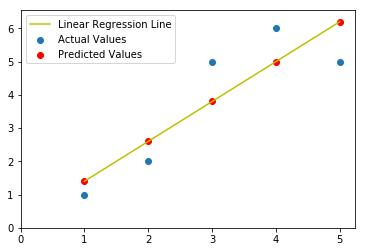

In [3]:
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = [1, 2, 5, 6, 5]
reg_A = lm.LinearRegression(normalize=True).fit(x, y)

print("Intercept: {}".format(round(reg_A.intercept_, 2)))
print("Slope: {}".format(reg_A.coef_))
print("Predicted y-value (fit with the line): {}".format(reg_A.predict(x))) # or reg_A.intercept_ + (reg_A.coef_ * x)
print("Coefficient of Determination (R-Squared): {}".format(round(reg_A.score(x, y), 3)))

plt.scatter(x, y, label="Actual Values") # actual value
plt.scatter(x, reg_A.predict(x), color="red", label="Predicted Values") # predicted value
plt.plot(x, reg_A.predict(x), 'y', label="Linear Regression Line") # to create LINEAR REGRESSION line
plt.legend()
plt.xlim(0)
plt.ylim(0)

* **Multiple Linear Regression**

In [4]:
x_multiple = np.array([[1, 2], [2, 0], [1, 1], [3, 0], [0, 2]])
reg_B = lm.LinearRegression(normalize=True).fit(x_multiple, y)

print("Intercept: {}".format(round(reg_B.intercept_, 2)))
print("Slope: {}".format(reg_B.coef_))
print("Predicted y-value (fit with the line): {}".format(reg_B.predict(x_multiple))) # or reg_B.intercept_ + (reg_B.coef_ * x)
print("Coefficient of Determination (R-Squared): {}".format(round(reg_B.score(x_multiple, y), 3)))

Intercept: 5.5
Slope: [-0.5 -1. ]
Predicted y-value (fit with the line): [3.  4.5 4.  4.  3.5]
Coefficient of Determination (R-Squared): 0.069


* **L1-Norm: LASSO**

In [5]:
lasso_reg = lm.Lasso(normalize=True, alpha=1).fit(x, y)
print("Intercept: {}". format(round(lasso_reg.intercept_, 2)))
print("Slope: {}". format(lasso_reg.coef_))

Intercept: 3.8
Slope: [0.]


* **L2-Norm: Ridge**

In [6]:
ridge_reg = lm.Ridge(normalize=True, alpha=1).fit(x, y)
print("Intercept: {}". format(round(ridge_reg.intercept_, 2)))
print("Slope: {}". format(ridge_reg.coef_))

Intercept: 2.0
Slope: [0.6]


* **Elastic-Net**

In [7]:
elasticNet_reg = lm.ElasticNet(normalize=True, alpha=1, l1_ratio=0.5).fit(x, y)
print("Intercept: {}". format(round(elasticNet_reg.intercept_, 2)))
print("Slope: {}". format(elasticNet_reg.coef_))

Intercept: 3.45
Slope: [0.11698017]


(0, 6.460689845474614)

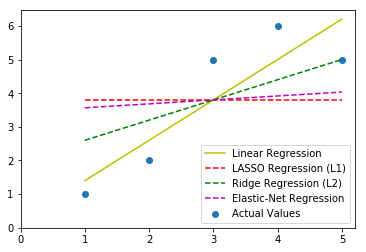

In [8]:
plt.scatter(x, y, label="Actual Values")
plt.plot(x, reg_A.predict(x), 'y', label="Linear Regression")
plt.plot(x, lasso_reg.predict(x), '--r', label="LASSO Regression (L1)")
plt.plot(x, ridge_reg.predict(x), '--g', label="Ridge Regression (L2)")
plt.plot(x, elasticNet_reg.predict(x), '--m', label="Elastic-Net Regression")
plt.legend(loc=4) # legends place in lower right
plt.xlim(0)
plt.ylim(0)

* **Logistic Regression**

Probability of Logistic Regression
 [[0.81559741 0.18440259]
 [0.60821977 0.39178023]
 [0.35271437 0.64728563]
 [0.16055648 0.83944352]
 [0.06291097 0.93708903]]
Probability of Logistic Regression outputs will be 0: [0.81559741 0.60821977 0.35271437 0.16055648 0.06291097]
Probability of Logistic Regression outputs will be 1: [0.18440259 0.39178023 0.64728563 0.83944352 0.93708903]
Total of Probability of Logistic Regression outputs: [1. 1. 1. 1. 1.]


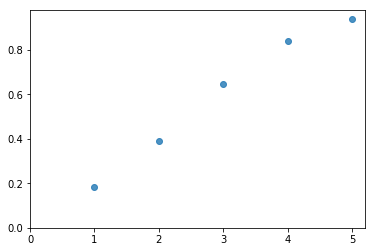

In [9]:
log_reg = lm.LogisticRegression().fit(x, [0, 0, 1, 1, 1])
sb.regplot(x=x, y=log_reg.predict_proba(x)[:,1], logistic=True)
plt.xlim(0)
plt.ylim(0)

print("Probability of Logistic Regression\n", log_reg.predict_proba(x))
print("Probability of Logistic Regression outputs will be 0:", log_reg.predict_proba(x)[:,0])
print("Probability of Logistic Regression outputs will be 1:", log_reg.predict_proba(x)[:,1])
print("Total of Probability of Logistic Regression outputs:", log_reg.predict_proba(x)[:,0] + log_reg.predict_proba(x)[:,1])

In [10]:
house = pd.read_csv("Data/House_Price.csv")
house = pd.get_dummies(house) # one-hot encoding for nominal/categorical data
house = house.drop(["airport_NO", "bus_ter_YES", "waterbody_Lake", "waterbody_Lake and River", "waterbody_River"], axis=1)
house.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_None
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,5.480,11.1920,23,0.049347,1,0
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,7.332,12.1728,42,0.046146,0,0
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,7.394,101.1200,38,0.045764,0,1
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,9.268,11.2672,45,0.047151,1,0
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,8.824,11.2896,55,0.039474,0,0


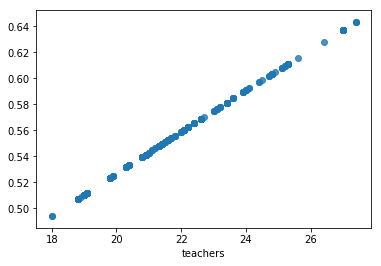

In [14]:
house.teachers.reshaped = np.array(house.teachers).reshape(-1, 1)
logistic_reg = lm.LogisticRegression().fit(house.teachers.reshaped, house.airport_YES)
sb.regplot(x=house.teachers, y=logistic_reg.predict_proba(house.teachers.reshaped)[:,1], logistic=True)